In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def median(var):
    if len(var) % 2 == 0:
        center = int(len(var)/2)
        print((var[center-1]+var[center])/2)
    else:
        center = round(len(a)/2,0)
        print(var[center])

In [17]:
idx = 0
a_dict = {}

for i, val in enumerate(a):
    if val not in a_dict.keys():
        a_dict[val] = 1
    else:
        a_dict[val] += 1 


In [3]:
filepath = '../pandas_textbook/part3/auto-mpg.csv'
df = pd.read_csv(filepath, header=None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [5]:
df.describe().round(2)

,0,1,2,4,5,6,7
count,398.00,398.00,398.00,398.00,398.00,398.00,398.00
mean,23.51,5.45,193.43,2970.42,15.57,76.01,1.57
std,7.82,1.70,104.27,846.84,2.76,3.70,0.80
min,9.00,3.00,68.00,1613.00,8.00,70.00,1.00
25%,17.50,4.00,104.25,2223.75,13.82,73.00,1.00
50%,23.00,4.00,148.50,2803.50,15.50,76.00,1.00
75%,29.00,8.00,262.00,3608.00,17.18,79.00,2.00
max,46.60,8.00,455.00,5140.00,24.80,82.00,3.00


In [8]:
np.std(df[2].values), df[2].std()

(104.13876352708573, 104.26983817119581)

In [9]:
df.corr().round(2)

,0,1,2,4,5,6,7
0,1.00,-0.78,-0.80,-0.83,0.42,0.58,0.56
1,-0.78,1.00,0.95,0.90,-0.51,-0.35,-0.56
2,-0.80,0.95,1.00,0.93,-0.54,-0.37,-0.61
4,-0.83,0.90,0.93,1.00,-0.42,-0.31,-0.58
5,0.42,-0.51,-0.54,-0.42,1.00,0.29,0.21
6,0.58,-0.35,-0.37,-0.31,0.29,1.00,0.18
7,0.56,-0.56,-0.61,-0.58,0.21,0.18,1.00


In [10]:
df[[0,1]].corr().round(2)

,0,1
0,1.00,-0.78
1,-0.78,1.00


In [24]:
# 남북한발전전력량.xlsx
filepath = '../pandas_textbook/part3/남북한발전전력량.xlsx'
df = pd.read_excel(filepath, engine='openpyxl')
df.info()
df_ns = df.iloc[[0,5],3:].astype(int)
df_ns.index = ['south', 'north']
df_ns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   전력량 (억㎾h)  2 non-null      object
 1   발전 전력별     9 non-null      object
 2   1990       9 non-null      object
 3   1991       9 non-null      object
 4   1992       9 non-null      object
 5   1993       9 non-null      object
 6   1994       9 non-null      object
 7   1995       9 non-null      object
 8   1996       9 non-null      object
 9   1997       9 non-null      object
 10  1998       9 non-null      object
 11  1999       9 non-null      object
 12  2000       9 non-null      object
 13  2001       9 non-null      object
 14  2002       9 non-null      object
 15  2003       9 non-null      object
 16  2004       9 non-null      object
 17  2005       9 non-null      object
 18  2006       9 non-null      object
 19  2007       9 non-null      object
 20  2008       9 non-null      object
 2

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
south,1186,1310,1444,1650,1847,2055,2244,2153,2393,2664,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
north,263,247,221,231,230,213,193,170,186,194,...,236,255,235,237,211,215,221,216,190,239


### 상관계수를 게산할 때 scaling한 후에 해라
### numpy.std는 모집단 표준편차, pandas.std는 표본의 표준편차이다.

In [ ]:
x = [1, 1, 1, 2, 3, 5, 5, 7, 8, 9]
hist, edges = np.histogram(x, bins=4)
sns.distplot(x, bins=4, kde=False)

In [26]:
tdf_ns = df_ns.T
tdf_ns.head(), tdf_ns.tail()

(      south  north
 1991   1186    263
 1992   1310    247
 1993   1444    221
 1994   1650    231
 1995   1847    230,
       south  north
 2012   5096    215
 2013   5171    221
 2014   5220    216
 2015   5281    190
 2016   5404    239)

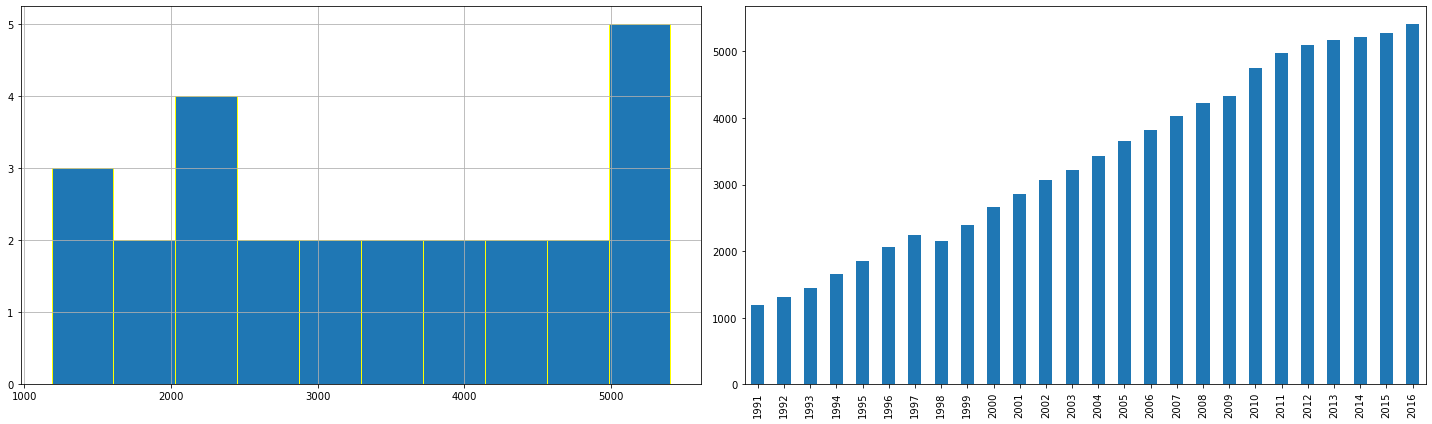

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))
tdf_ns.south.hist(bins=10, edgecolor='yellow', ax=ax[0])
tdf_ns.south.plot(kind='bar', ax=ax[1])
plt.tight_layout()
plt.show()

In [35]:
tdf_ns.describe().round(2)

,south,north
count,26.00,26.00
mean,3363.31,216.81
std,1393.90,22.86
min,1186.00,170.00
25%,2175.75,197.50
50%,3323.00,215.50
75%,4644.25,234.00
max,5404.00,263.00
